In [1]:
# Load dataset and import packages
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from library.sb_utils import save_file
data=pd.read_csv('../data/data_cleaned.csv')

In [2]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.shape


(569, 31)

* Since there are 30 features in the dataset, PCA is used as dimention reduction technique to filter out the pricipla components of the dataset.



In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



Text(0, 0.5, 'Proportion of Variance Explained')

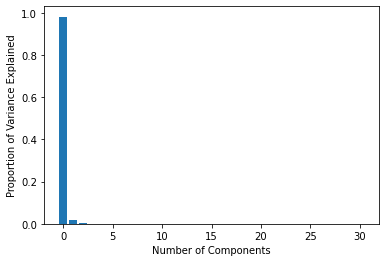

In [5]:

# Initialize a new PCA model with a default number of components.
from sklearn.decomposition import PCA

# Initialize a variable, called pca, and assign it sklearn.decomposition.PCA() 
pca = PCA()

# Call fit() on pca, with X passed to the method
pca.fit(data)

# Let's finish this :)  Make a variable called variance
variance = pca.explained_variance_ratio_

# Plot() it 
plt.bar(range(len(variance)), variance)

# Label the axes
plt.xlabel("Number of Components")
plt.ylabel("Proportion of Variance Explained")


From above PCA component plot, we can see that principle components = 2 is suggested by the PCA dimentional reduction.


## To better visualize each features, modify the name of each column

In [6]:
#extract the original name
original_name=data.columns
original_name=original_name.tolist()
original_name

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [7]:
# add number to each name for easier visualization
new_name=[]
i=0
for name in original_name:
    new=name+ '_' + str(i)
    str(i) + "-" + name
    new_name.append(new)
    i+=1

new_name

['diagnosis_0',
 'radius_mean_1',
 'texture_mean_2',
 'perimeter_mean_3',
 'area_mean_4',
 'smoothness_mean_5',
 'compactness_mean_6',
 'concavity_mean_7',
 'concave points_mean_8',
 'symmetry_mean_9',
 'fractal_dimension_mean_10',
 'radius_se_11',
 'texture_se_12',
 'perimeter_se_13',
 'area_se_14',
 'smoothness_se_15',
 'compactness_se_16',
 'concavity_se_17',
 'concave points_se_18',
 'symmetry_se_19',
 'fractal_dimension_se_20',
 'radius_worst_21',
 'texture_worst_22',
 'perimeter_worst_23',
 'area_worst_24',
 'smoothness_worst_25',
 'compactness_worst_26',
 'concavity_worst_27',
 'concave points_worst_28',
 'symmetry_worst_29',
 'fractal_dimension_worst_30']

In [8]:
data.columns=new_name
data.columns

Index(['diagnosis_0', 'radius_mean_1', 'texture_mean_2', 'perimeter_mean_3',
       'area_mean_4', 'smoothness_mean_5', 'compactness_mean_6',
       'concavity_mean_7', 'concave points_mean_8', 'symmetry_mean_9',
       'fractal_dimension_mean_10', 'radius_se_11', 'texture_se_12',
       'perimeter_se_13', 'area_se_14', 'smoothness_se_15',
       'compactness_se_16', 'concavity_se_17', 'concave points_se_18',
       'symmetry_se_19', 'fractal_dimension_se_20', 'radius_worst_21',
       'texture_worst_22', 'perimeter_worst_23', 'area_worst_24',
       'smoothness_worst_25', 'compactness_worst_26', 'concavity_worst_27',
       'concave points_worst_28', 'symmetry_worst_29',
       'fractal_dimension_worst_30'],
      dtype='object')

<AxesSubplot:>

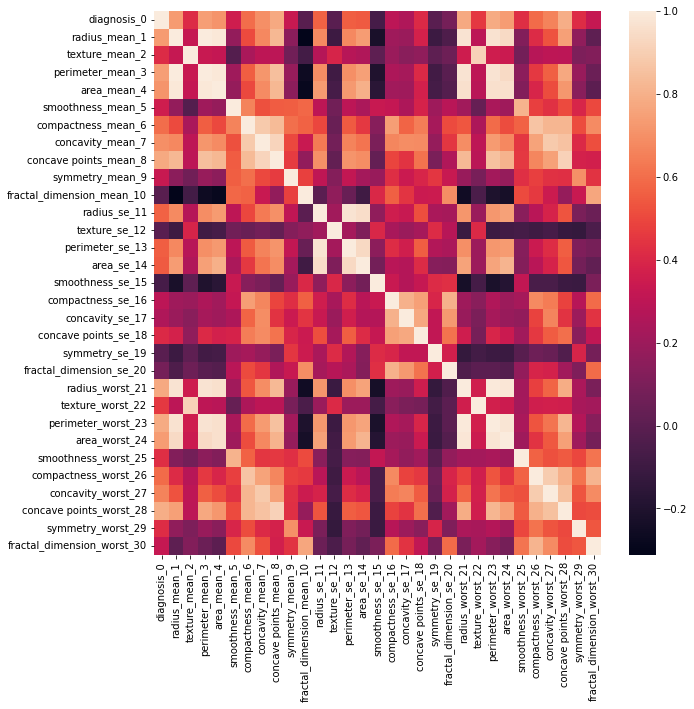

In [9]:
#Visualize correlation with heatmap
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr())

<AxesSubplot:>

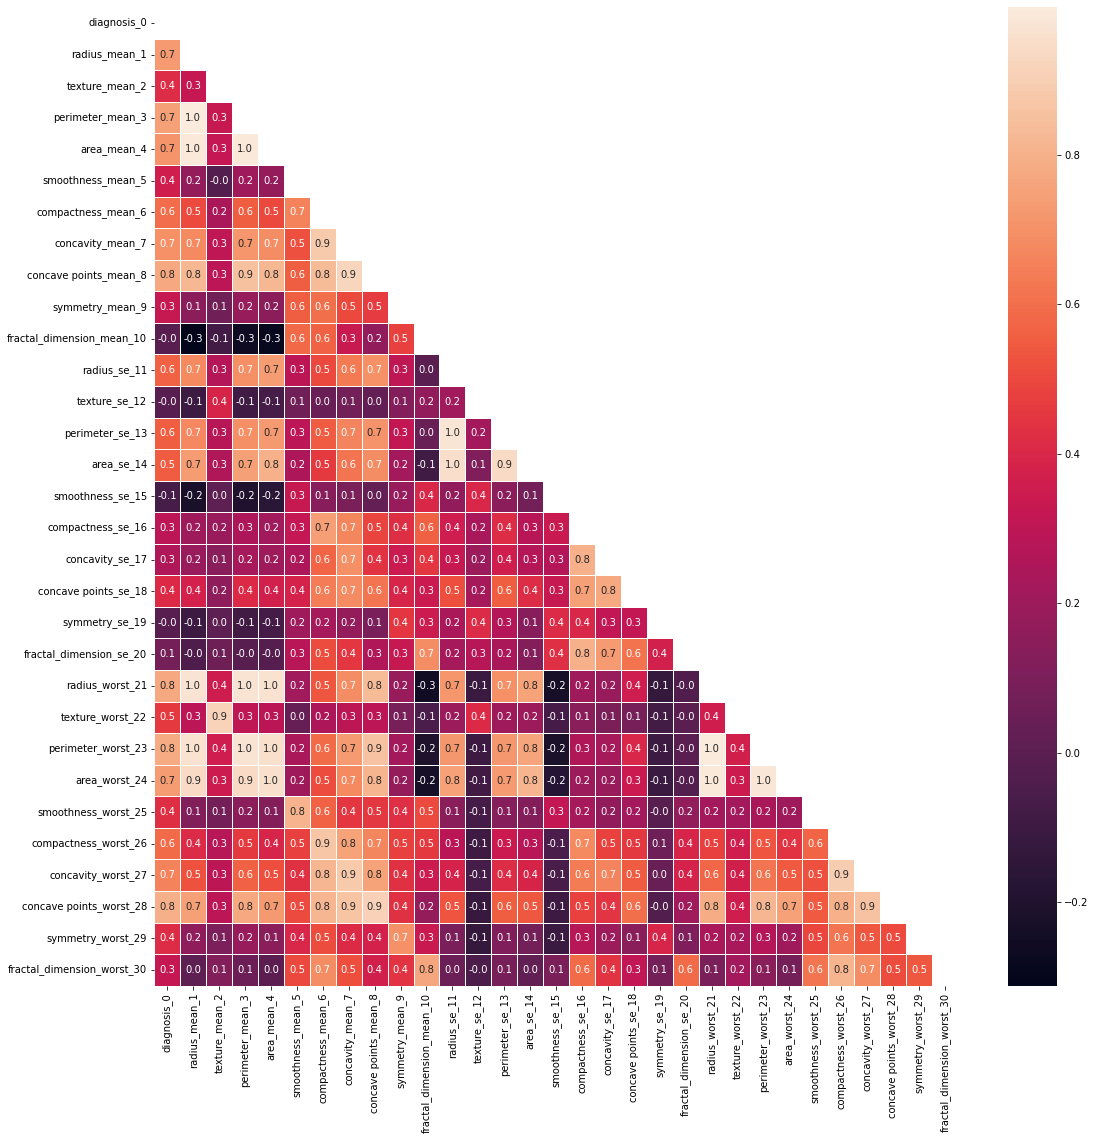

In [15]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)

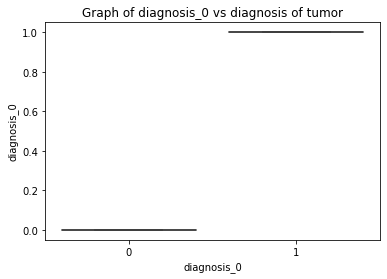

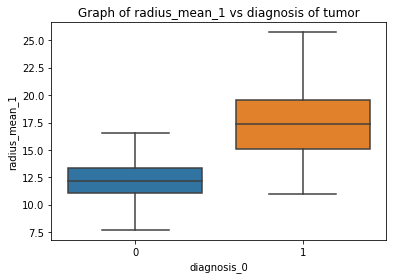

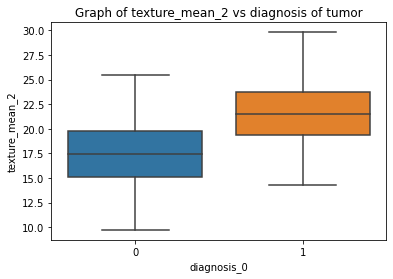

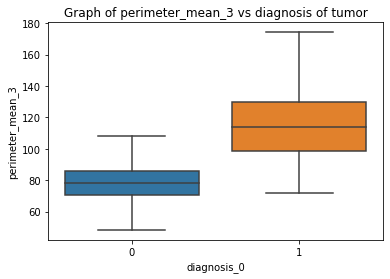

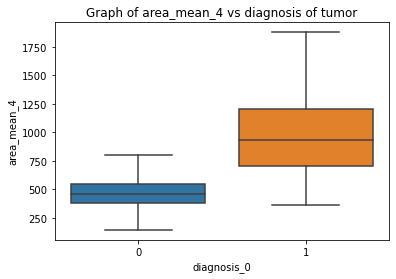

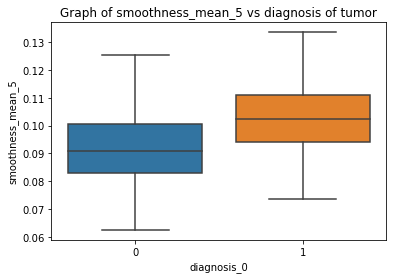

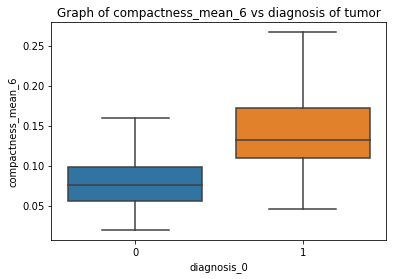

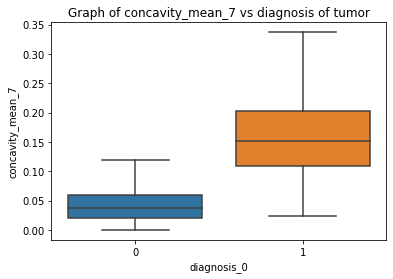

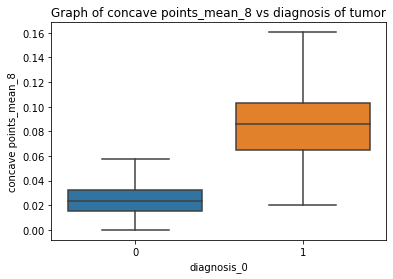

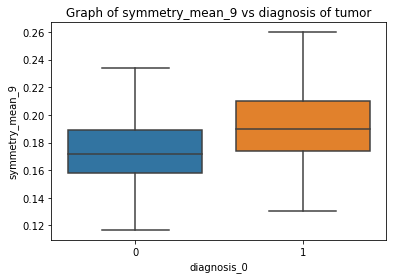

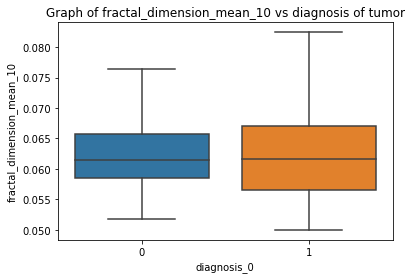

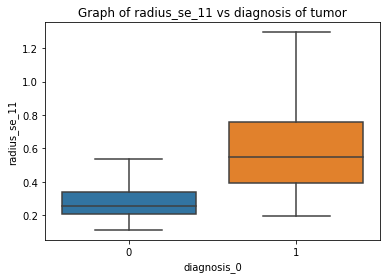

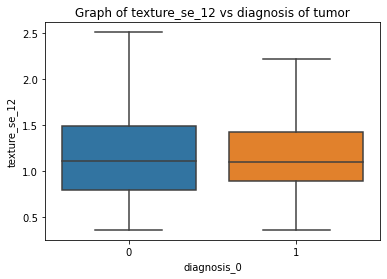

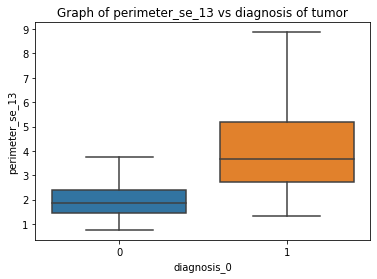

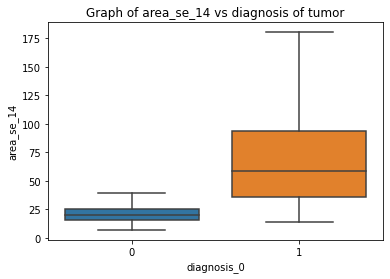

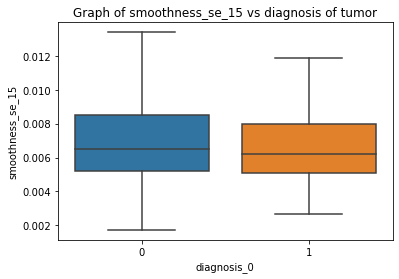

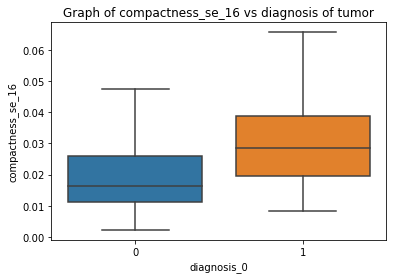

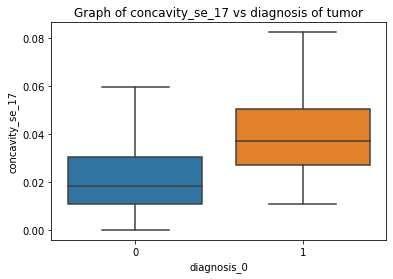

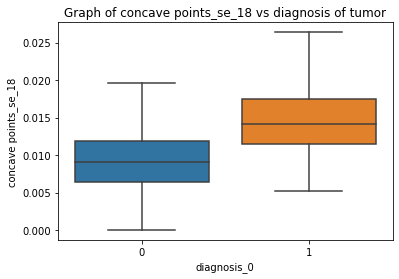

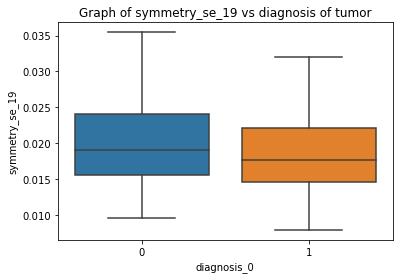

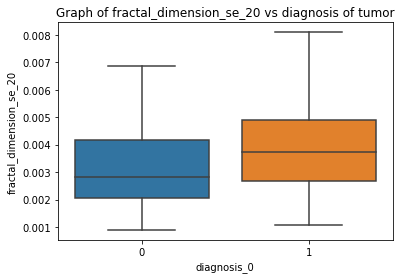

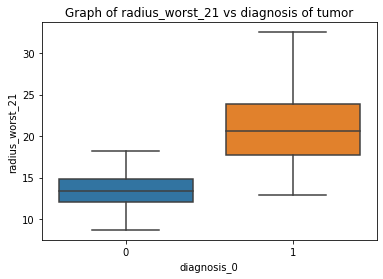

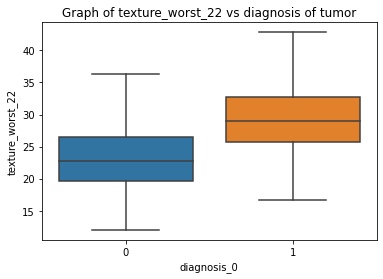

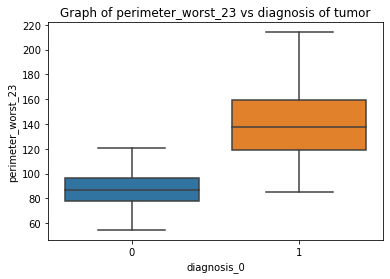

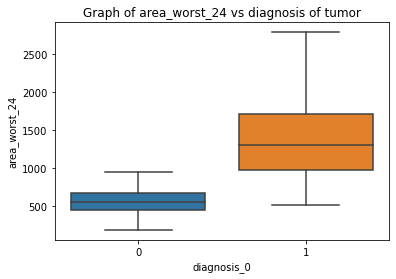

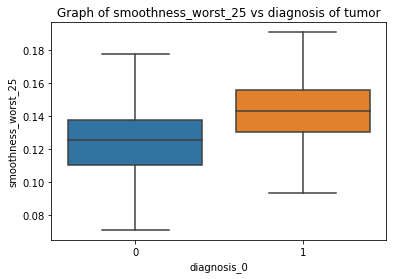

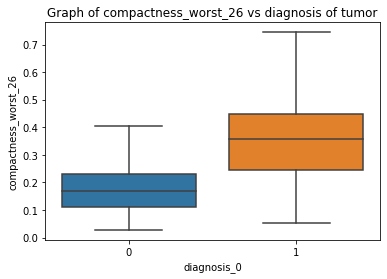

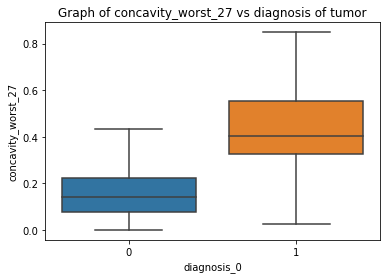

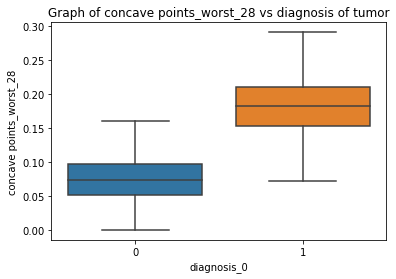

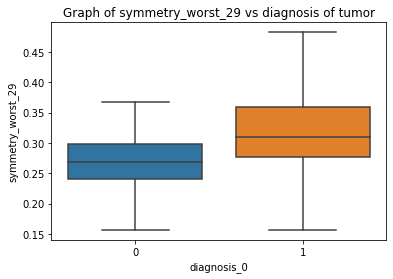

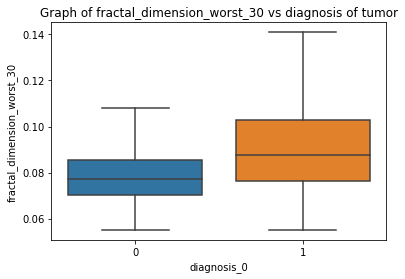

In [23]:
# boxplot
for i in new_name:
    plot = sns.boxplot(x='diagnosis_0', y=i, data=data, showfliers=False)
    plot.set_title("Graph of " + str(i) + " vs diagnosis of tumor" )
    plt.show()               



## To confirm and learn more about the relationship between features, Random Forest algorithm is used to understand the feature importances of the dataset. 

## Feature importances by random forest build in features

In [30]:
#load package
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [27]:
y=data['diagnosis_0']
X = data.drop('diagnosis_0',axis=1)
X_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [31]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
rf.feature_importances_

array([0.02105805, 0.01444744, 0.02034825, 0.02854943, 0.00596658,
       0.00920202, 0.07806048, 0.23016759, 0.00646922, 0.00517454,
       0.01401929, 0.00633597, 0.01201357, 0.01587585, 0.00275702,
       0.00621884, 0.01376885, 0.00274291, 0.00499398, 0.007008  ,
       0.08003233, 0.01738722, 0.12185013, 0.09836952, 0.00775479,
       0.00919856, 0.03587679, 0.10799696, 0.0088395 , 0.00751631])

<BarContainer object of 30 artists>

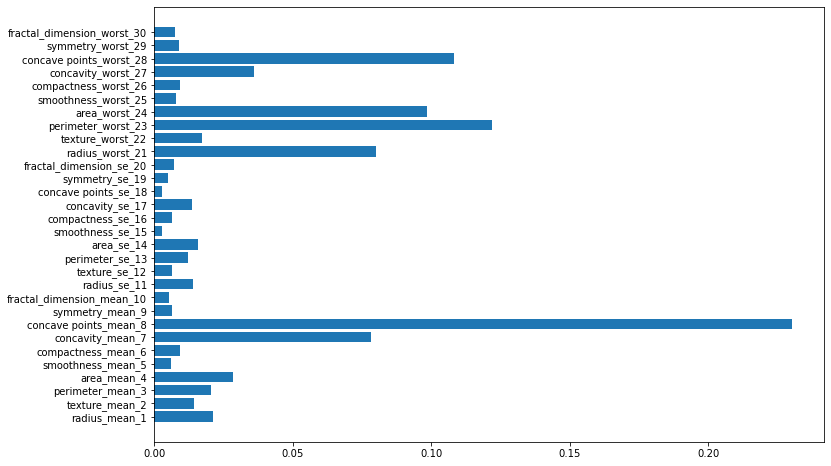

In [57]:
# visualize feature importances with barchart
plt.rcParams.update({'figure.figsize': (12.0, 8.0)}) #set figure size
plt.barh(data.columns.drop('diagnosis_0'), rf.feature_importances_)

<BarContainer object of 30 artists>

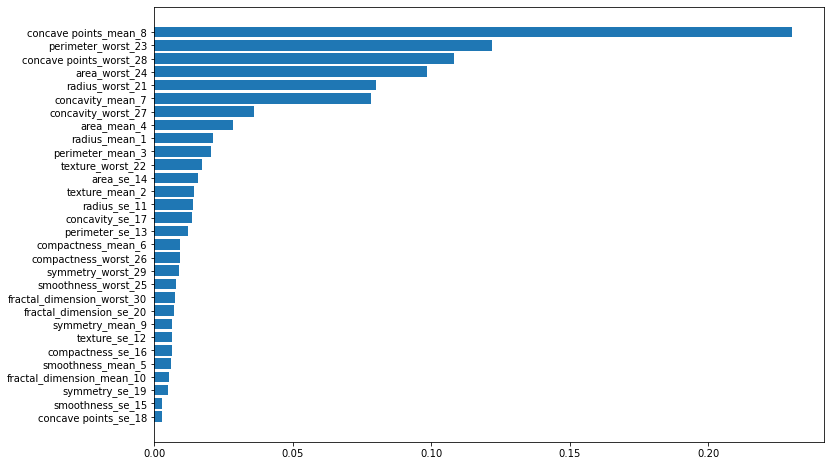

In [58]:
# visualize feature importances with barchart
plt.rcParams.update({'figure.figsize': (12.0, 8.0)}) #set figure size
sorted_idx = rf.feature_importances_.argsort() # sort feature based on importances
plt.barh(data.columns.drop('diagnosis_0')[sorted_idx], rf.feature_importances_[sorted_idx])

From the aboved graph, we can see that top six features, which are feature #8,23,28,24,21,7, are heavily contributed to the diagnosis of tumor

## Feature importance computed with SHAP values

In [61]:
pip install shap

     |████████████████████████████████| 436 kB 1.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


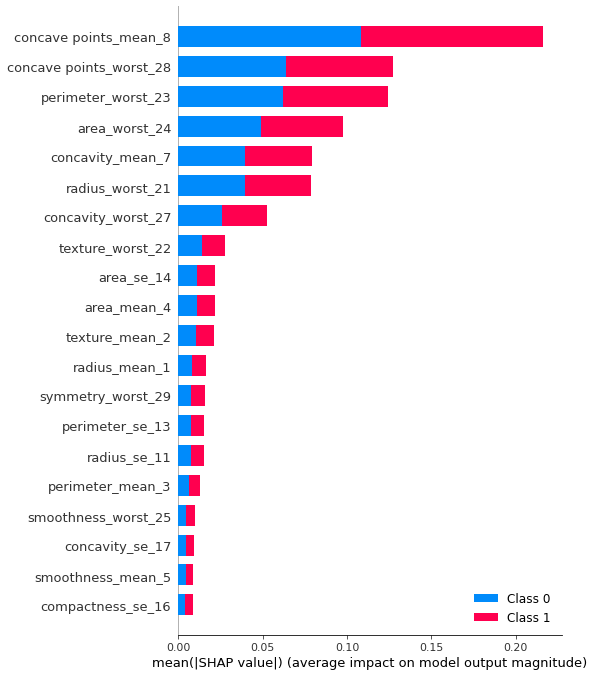

In [64]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar")

the aboved graph suggested the feature #8, 28, 23, 24, 7,21 are heavily contributed to the model prediction

## Conclusion and Summary

Since there are 30 features available in the dataset, dimentional reduction is needed to filter out the most relavant components that contribute to the diagnosis. PCA dimentional reduction was not helpful in this dataset. Therefore, feature importances by random forest are used to pick the most relavant features for modeling. The next steps is that multiple models will be used with the selected sets of features to identity the best model for tumor diagnosis. 

Potential models: SVM, Decision Tree, KNN, Random Forest, Logistic Regression. 